In [53]:
# Exploratory Data Analysis (EDA) for Stroke Prediction Dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Shape of dataset: (5110, 12)

Column names: ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

Missing values:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Data types:
 id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Summary statistics:
                  id          age  hypertension  heart_disease  \
co

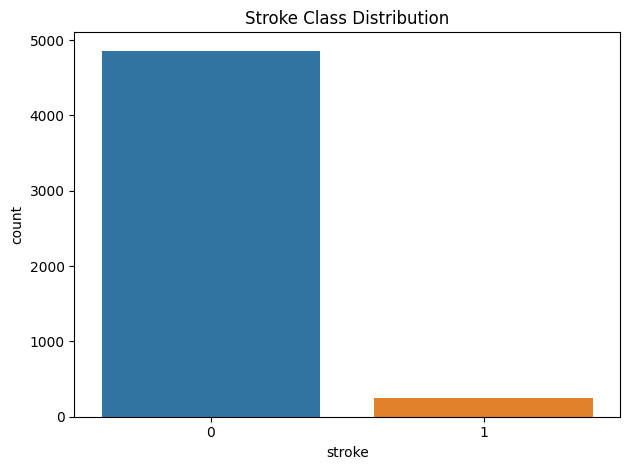

In [ ]:
# Load Cleaned Data
df = pd.read_csv('/Users/sptsai/Documents/GitHub/Stroke_Prediction/stroke_data.csv')

# Fill missing values
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

# Basic Info and Summary
print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nSummary statistics:\n", df.describe())

# Class Imbalance Visualization
sns.countplot(x='stroke', data=df)
plt.title("Stroke Class Distribution")
plt.tight_layout()
plt.show()

Observation:
- Shows the distribution of stroke vs non-stroke cases. Class 1 (stroke) is underrepresented (<5%), indicating class imbalance.

/Users/sptsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


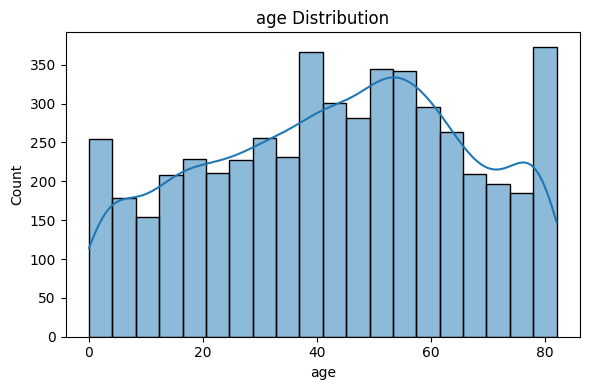

/Users/sptsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


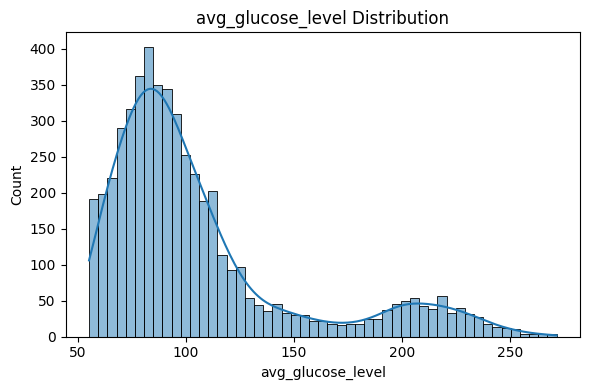

/Users/sptsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


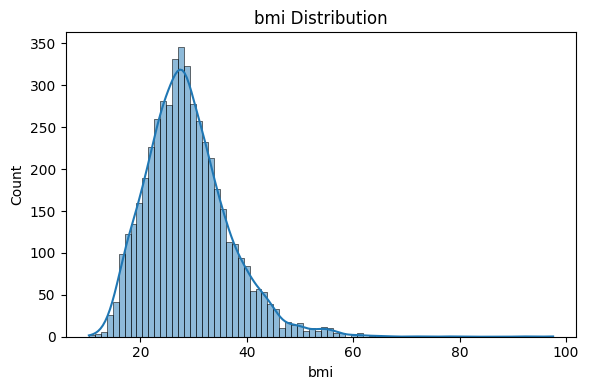

In [ ]:
# Distributions of Continuous Features
continuous_features = ['age', 'avg_glucose_level', 'bmi']
for col in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.tight_layout()
    plt.show()

Observation:
- Visualizes the distribution of each continuous feature to check skewness, outliers, and value ranges.

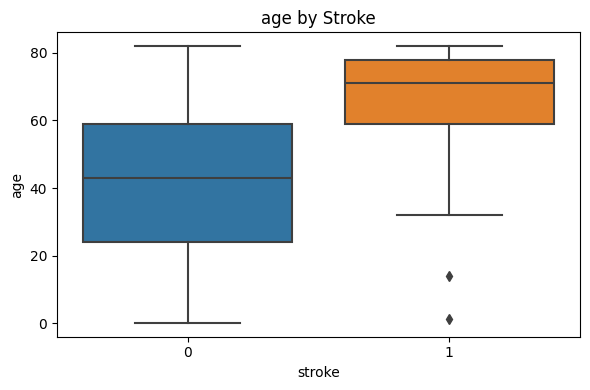

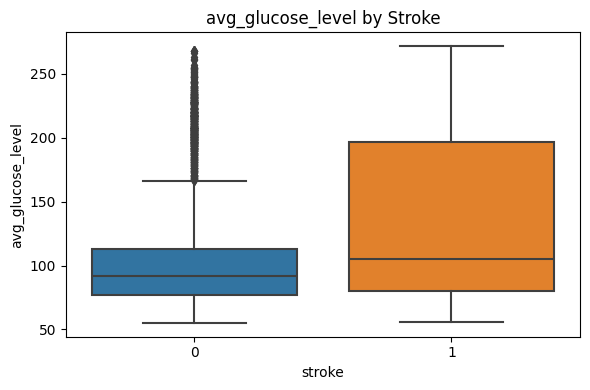

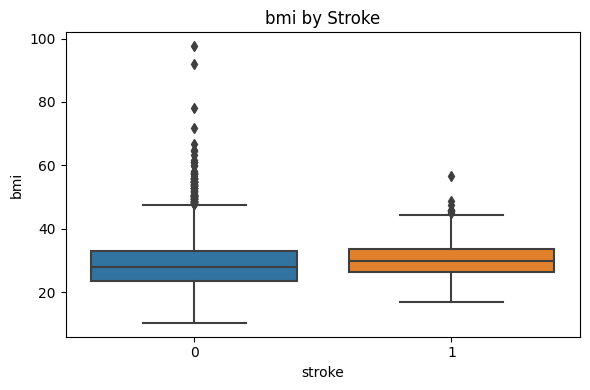

In [ ]:
# Boxplots: Feature vs Stroke
for col in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='stroke', y=col, data=df)
    plt.title(f"{col} by Stroke")
    plt.tight_layout()
    plt.show()



Observation:
- Compares distributions of each feature between stroke and non-stroke groups. Useful to detect median shifts and outliers.

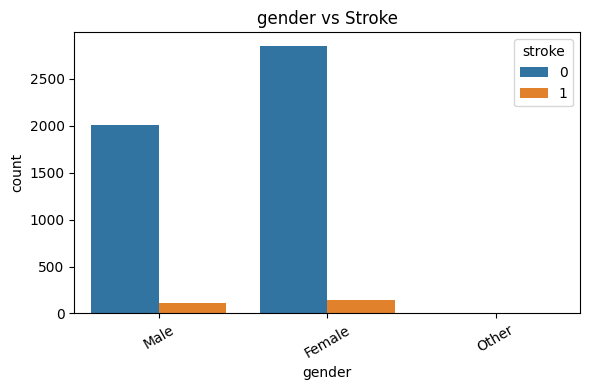

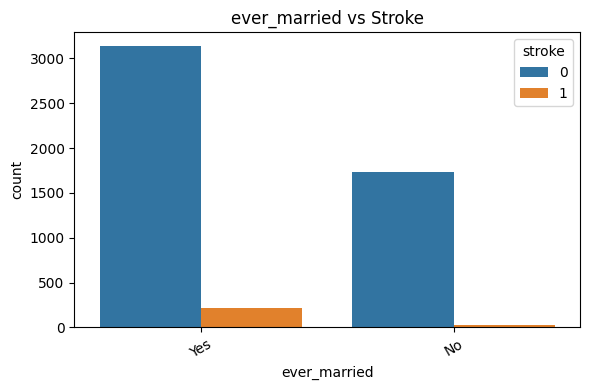

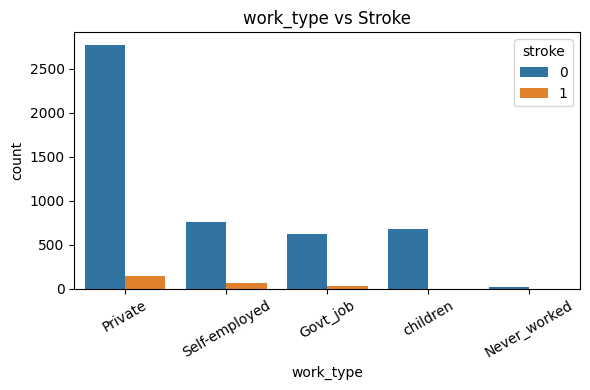

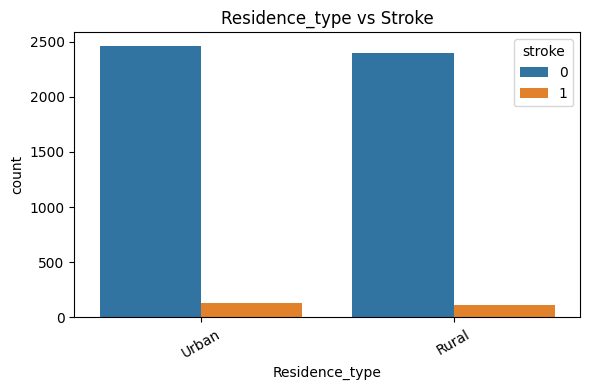

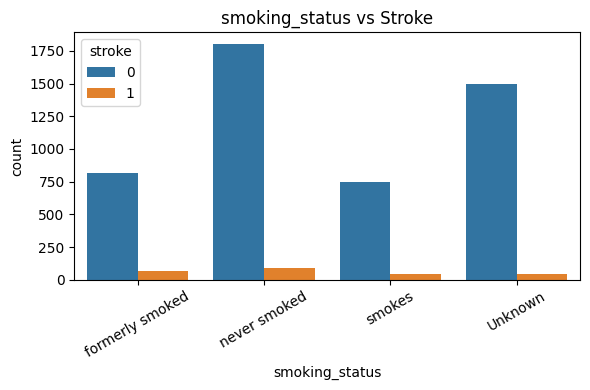

In [ ]:
# Categorical Features vs Stroke
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='stroke', data=df)
    plt.title(f"{col} vs Stroke")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

Observation:
- Shows stroke distribution within each category. Helps identify risk patterns in work type, marital status, etc.

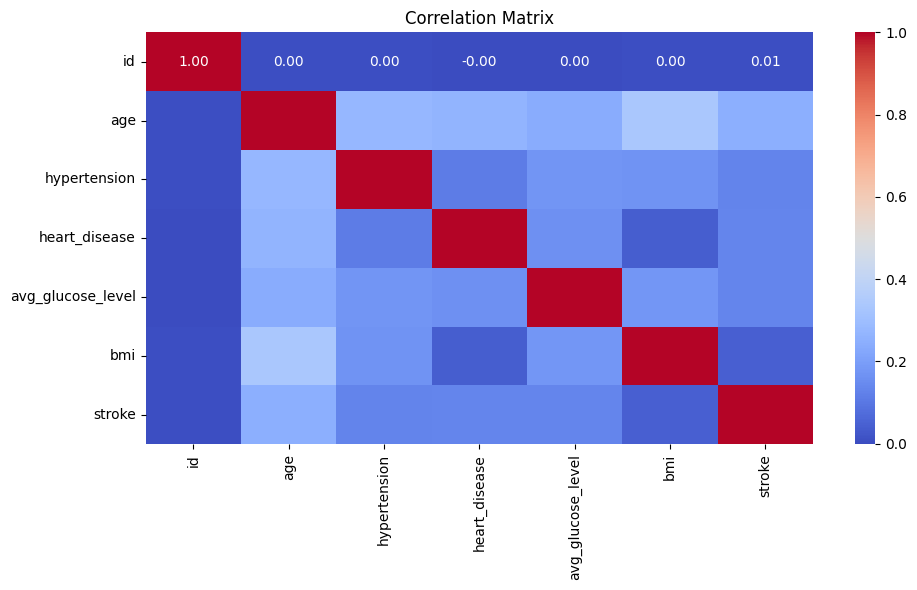

In [ ]:
# Correlation Matrix
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

Observation:
- Visualizes linear correlations between features. Highlights potential predictors that are strongly related to stroke.

/Users/sptsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sptsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

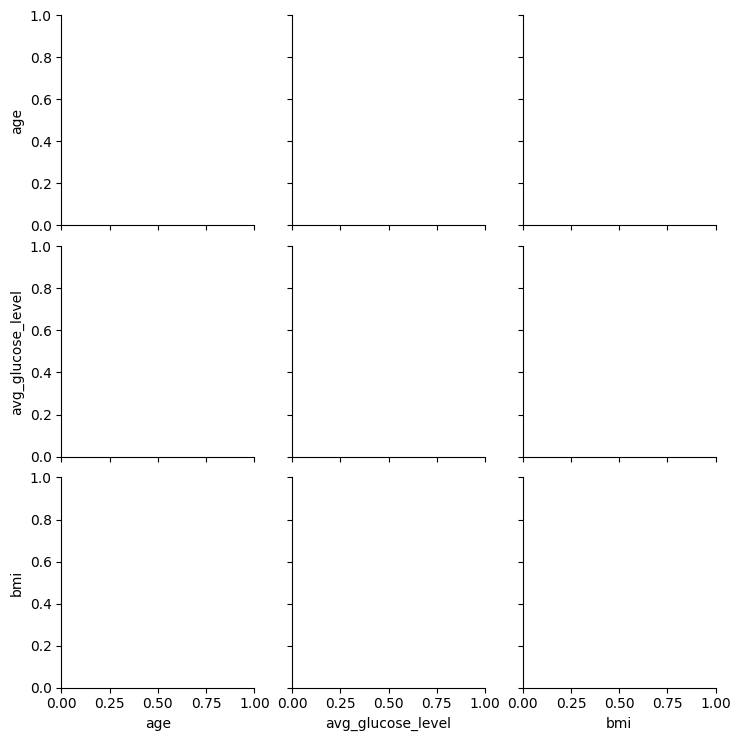

In [ ]:
# Pairplot (optional for overview)
selected = ['age', 'avg_glucose_level', 'bmi', 'stroke']
sns.pairplot(df[selected], hue='stroke')
plt.show()



Observation:
- Scatter plot matrix shows relationships and separability among features by stroke class.

EDA Summary:
- The dataset is highly imbalanced. Stroke cases account for only ~5%.
- Stroke patients tend to have higher age and glucose levels.
- Categorical variables like work_type and smoking_status may show differential stroke risk.
- Imbalance must be addressed before modeling (e.g., using class weights or SMOTE).
